In [79]:
# Diabetes Prediction Project
# This notebook demonstrates how to predict diabetes using machine learning models trained on the Pima Indians Diabetes Dataset.


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [87]:
## Data Loading and Exploration

# Loaded the dataset using pandas.
# Displayed the first few rows to understand the data structure.
# Next, we'll check for missing values and get a summary.


In [89]:
df=pd.read_csv(r"C:\Users\aajay\Downloads\archive (2)\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [91]:
print(df.head())
print(df.info())
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [93]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


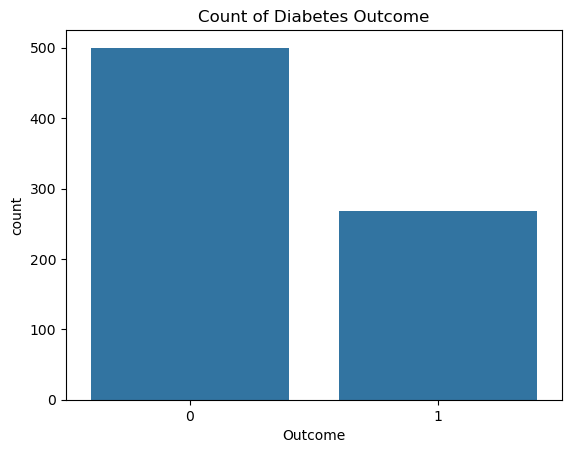

In [95]:
sns.countplot(x='Outcome', data=df)
plt.title('Count of Diabetes Outcome')
plt.show()

In [97]:
## Exploratory Data Analysis (EDA)

# The target variable 'Outcome' is slightly imbalanced.
# Next, we look at correlations between features.


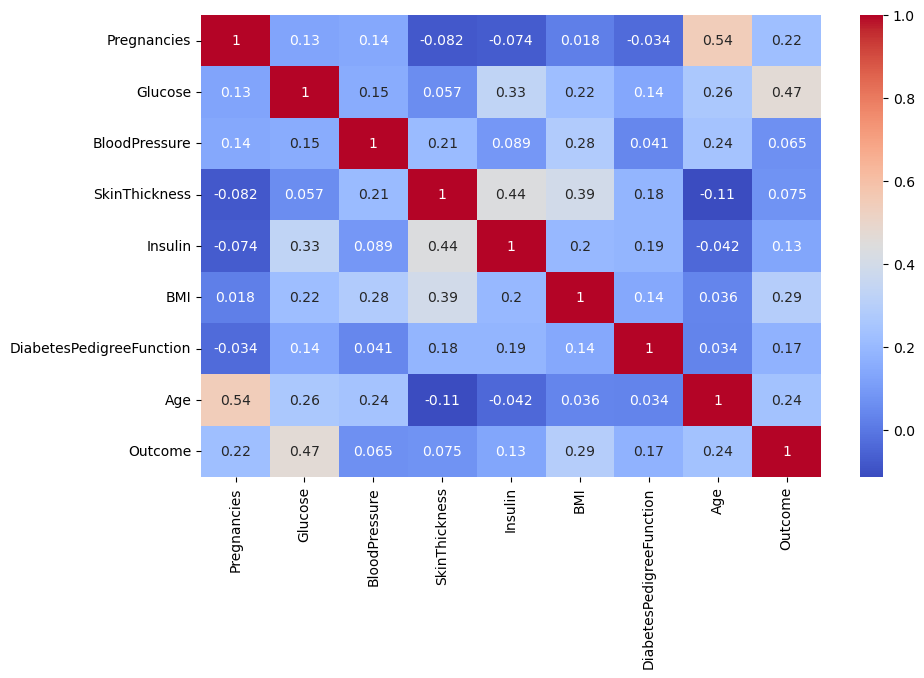

In [99]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [100]:
## Data Preprocessing

# Split data into training and test sets.
# Scaled features using StandardScaler for better model performance.


In [103]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [105]:
print(x)
y

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [107]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [109]:
xtrain.shape

(614, 8)

In [111]:
xtest.shape

(154, 8)

In [113]:
ytrain.shape

(614,)

In [115]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [117]:
logreg = LogisticRegression()
logreg.fit(xtrain_scaled, ytrain)
ypred_logreg = logreg.predict(xtest_scaled)

In [119]:
print("Logistic Regression Accuracy:", accuracy_score(ytest, ypred_logreg))
print(confusion_matrix(ytest, ypred_logreg))
print(classification_report(ytest, ypred_logreg))

Logistic Regression Accuracy: 0.7532467532467533
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [121]:
## Logistic Regression Model

# Achieved ~75% accuracy.
# Performance metrics show reasonable balance between precision and recall.


In [123]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)  
y_pred_rf = rf.predict(xtest)

In [124]:
print("Random Forest Accuracy:", accuracy_score(ytest, y_pred_rf))
print(confusion_matrix(ytest, y_pred_rf))
print(classification_report(ytest, y_pred_rf))

Random Forest Accuracy: 0.7207792207792207
[[77 22]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [127]:
## Random Forest Model

# Accuracy around 72%.
# Useful to check feature importances next.


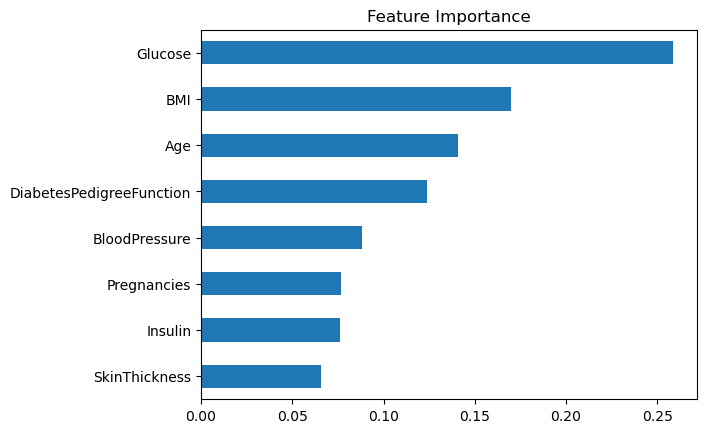

In [129]:
feature_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()


In [131]:
## Feature Importance

# Glucose, BMI, and Age are the most important predictors for diabetes.


In [133]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(xtrain, ytrain)
y_pred_xgb = xgb.predict(xtest)


C:\Users\aajay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:45:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [135]:
print("XGBoost Accuracy:", accuracy_score(ytest, y_pred_xgb))
print(classification_report(ytest, y_pred_xgb))


XGBoost Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.59      0.71      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154



<Axes: xlabel='Outcome', ylabel='count'>

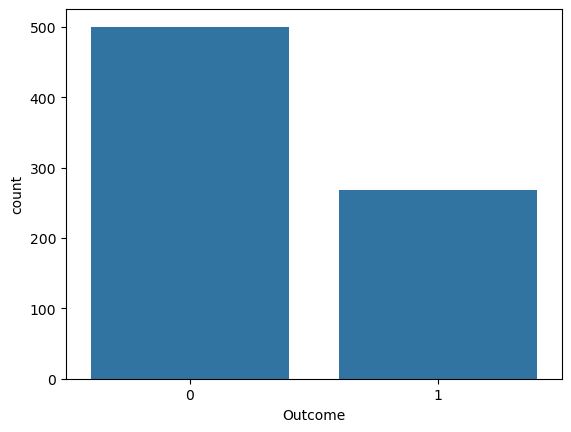

In [137]:
sns.countplot(x='Outcome', data=df)

In [143]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, x, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.7669977081741788


In [147]:
scores = cross_val_score(logreg, scaler.transform(x), y, cv=5)
print(f"Cross-validated accuracy: {np.mean(scores)*100:.2f}%")


Cross-validated accuracy: 77.09%


In [149]:
xgb_scores = cross_val_score(xgb, X_scaled, y, cv=5)
print(f"XGBoost Cross-Validated Accuracy: {np.mean(xgb_scores)*100:.2f}%")

C:\Users\aajay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\aajay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\aajay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Cross-Validated Accuracy: 74.10%


C:\Users\aajay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\aajay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
## Cross-validation

# Cross-validation shows the Logistic Regression model generalizes well with an average accuracy of about 77%.
